# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                     PI                        \
var                                       SS DF      F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD        0.590  1  1.005 0.317 0.005   
                             age       0.171  1  0.292 0.590 0.002   
                             Kiel      2.467  1  4.201 0.042 0.022   
                             Magdeburg 4.963  1  8.450 0.004 0.042   
                             Sweden    8.289  1 14.113 0.000 0.069   
...                                      ... ..    ...   ...   ...   
S4R3U6                       AD        0.019  1  0.016 0.899 0.000   
                             age       0.814  1  0.703 0.403 0.004   
                             Kiel      0.247  1  0.213 0.645 0.001   
                             Magdeburg 4.888  1  4.220 0.041 0.022   
                             Sweden    8.213  1  7.091 0.008 0.036   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.499  0.481    False  
                             age               0.229  0.722    False  
                             Kiel              1.379  0.106    False  
                             Magdeburg         2.389  0.016     True  
                             Sweden            3.641  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.046  0.942    False  
                             age               0.395  0.562    False  
                             Kiel              0.191  0.767    False  
                             Magdeburg         1.384  0.105    False  
                             Sweden            2.075  0.029     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.058  1  7.692 0.006 0.039   
                             age        0.008  1  0.059 0.808 0.000   
                             Kiel       0.276  1  2.002 0.159 0.010   
                             Magdeburg  0.457  1  3.319 0.070 0.017   
                             Sweden     1.658  1 12.046 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.666  1  4.868 0.029 0.025   
                             age        0.273  1  0.498 0.481 0.003   
                             Kiel       2.303  1  4.206 0.042 0.022   
                             Magdeburg  2.771  1  5.061 0.026 0.026   
                             Sweden    18.656  1 34.066 0.000 0.151   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.215  0.017     True  
                             age               0.093  0.872    False  
                             Kiel              0.799  0.262    False  
                             Magdeburg         1.154  0.136    False  
                             Sweden            3.193  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.544  0.064    False  
                             age               0.318  0.607    False  
                             Kiel              1.380  0.088    False  
                             Magdeburg         1.592  0.059    False  
                             Sweden            7.648  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.317         0.499  0.481    False   
                             Kiel      0.042         1.379  0.106    False   
                             Magdeburg 0.004         2.389  0.016     True   
                             Sweden    0.000         3.641  0.001     True   
                             age       0.590         0.229  0.722    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.899         0.046  0.942    False   
                             Kiel      0.645         0.191  0.767    False   
                             Magdeburg 0.041         1.384  0.105    False   
                             Sweden    0.008         2.075  0.029     True   
                             age       0.403         0.395  0.562    False   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.215  0.017     True  
                             Kiel      0.159         0.799  0.262    False  
                             Magdeburg 0.070         1.154  0.136    False  
                             Sweden    0.001         3.193  0.002     True  
                             age       0.808         0.093  0.872    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.029         1.544  0.064    False  
                             Kiel      0.042         1.380  0.088    False  
                             Magdeburg 0.026         1.592  0.059    False  
                             Sweden    0.000         7.648  0.000     True  
                             age       0.481         0.318  0.607    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.475     0.337     0.224         3.306     0.277
std       0.303         5.289     0.330     0.294         6.171     0.321
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.004         0.340     0.015     0.000         0.412     0.002
50%       0.120         0.919     0.241     0.058         1.238     0.116
75%       0.457         2.413     0.609     0.387         3.344     0.516
max       0.999       145.797     0.999     1.000        86.305     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34308/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.317         0.499   
A0A024R0T9;K7ER74;P02655                           AD     0.046         1.342   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.158         0.801   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.505         0.297   
A0A075B6H7                                         AD     0.128         0.892   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.113         0.947   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.564         0.249   
S4R3U6                                             AD     0.899         0.046   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.481    False   
A0A024R0T9;K7ER74;P02655                           AD      0.114    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.293    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.652    False   
A0A075B6H7                                         AD      0.252    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.230    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.183    False   
Q9Y6Y9                                             AD      0.700    False   
S4R3U6                                             AD      0.942    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.215   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.494   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.302         0.520   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.249         0.604   
A0A075B6H7                                         AD     0.002         2.784   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.201         0.698   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.899         0.046   
S4R3U6                                             AD     0.029         1.544   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.017     True  
A0A024R0T9;K7ER74;P02655                           AD      0.071    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.432    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.372    False  
A0A075B6H7                                         AD      0.006     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.257         1.393     0.340     0.238         1.616     0.297
std       0.294         1.620     0.318     0.294         1.868     0.317
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.012         0.364     0.040     0.007         0.381     0.019
50%       0.125         0.902     0.247     0.085         1.070     0.159
75%       0.433         1.908     0.589     0.416         2.172     0.546
max       0.998        19.442     0.998     1.000        21.633     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1039,923


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.317         0.499  0.481   
A0A024R0T9;K7ER74;P02655                           0.046         1.342  0.114   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.158         0.801  0.293   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.505         0.297  0.652   
A0A075B6H7                                         0.128         0.892  0.252   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.113         0.947  0.230   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.183   
Q9Y6Y9                                             0.564         0.249  0.700   
S4R3U6                                             0.899         0.046  0.942   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.006   
A0A024R0T9;K7ER74;P02655                              False 0.032   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.302   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.249   
A0A075B6H7                                            False 0.002   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.201   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.899   
S4R3U6                                                False 0.029   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.215  0.017   
A0A024R0T9;K7ER74;P02655                                   1.494  0.071   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.520  0.432   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.604  0.372   
A0A075B6H7                                                 2.784  0.006   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.284   
Q9Y6X5                                                     0.698  0.316   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.156   
Q9Y6Y9                                                     0.046  0.935   
S4R3U6                                                     1.544  0.064   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    873
PI (yes) - VAE (yes)   332
PI (no)  - VAE (yes)   166
PI (yes) - VAE (no)     50
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34308/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.317         0.499  0.481    False 0.006   
A0A075B6H7                   0.128         0.892  0.252    False 0.002   
A0A075B6H9                   0.394         0.404  0.555    False 0.017   
A0A075B6I0                   0.021         1.678  0.062    False 0.001   
A0A075B6J9                   0.053         1.275  0.128    False 0.015   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.007         2.139  0.026     True 0.952   
Q9UP79                       0.670         0.174  0.787    False 0.000   
Q9UQ52                       0.087         1.061  0.188    False 0.001   
Q9Y281;Q9Y281-3              0.274         0.562  0.432    False 0.002   
Q9Y6C2                       0.659         0.181  0.777    False 0.003   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.215  0.017     True       186  
A0A075B6H7                           2.784  0.006     True        91  
A0A075B6H9                           1.780  0.041     True       189  
A0A075B6I0                           3.177  0.003     True       194  
A0A075B6J9                           1.818  0.038     True       156  
...                                    ...    ...      ...       ...  
Q9UNW1                               0.022  0.970    False       171  
Q9UP79                               4.728  0.000     True       135  
Q9UQ52                               3.255  0.002     True       188  
Q9Y281;Q9Y281-3                      2.707  0.007     True        51  
Q9Y6C2                               2.561  0.009     True       119  

[216 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.481,0.017,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.114,0.071,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.293,0.432,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.652,0.372,196,PI (no) - VAE (no)
A0A075B6H7,0.252,0.006,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.316,0.284,197,PI (no) - VAE (no)
Q9Y6X5,0.230,0.316,173,PI (no) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.183,0.156,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
O15204;O15204-2,0.997,0.007,156,PI (no) - VAE (yes),0.989
O60565,0.969,0.000,81,PI (no) - VAE (yes),0.969
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.955,0.000,134,PI (no) - VAE (yes),0.955
P22692;P22692-2,0.978,0.027,170,PI (no) - VAE (yes),0.952
A0A087X152;D6RE16;E0CX15;O95185;O95185-2,0.021,0.972,176,PI (yes) - VAE (no),0.951
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.046,197,PI (no) - VAE (yes),0.011
Q9NX62,0.056,0.045,197,PI (no) - VAE (yes),0.011
P00740;P00740-2,0.053,0.042,197,PI (no) - VAE (yes),0.011


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


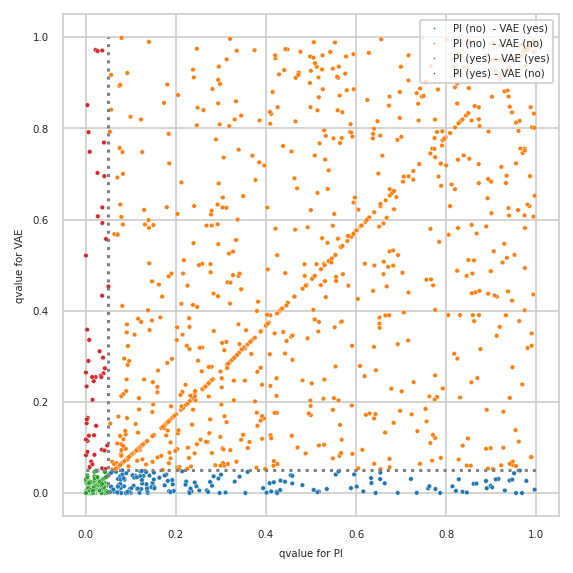

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


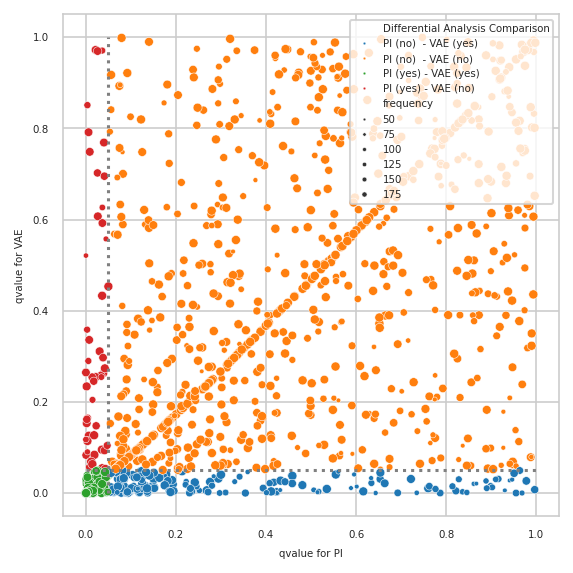

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
MAPT,ENSP00000340820,4.800
...,...,...
MRPL1,ENSP00000315017,0.681
AASS,ENSP00000403768,0.681
MOB4,ENSP00000315702,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out